In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
df = pd.read_csv('user-item-interactions.csv')
df1 = pd.read_csv('articles_community.csv')
df.head()


,Unnamed: 0,article_id,title,email
0,0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [66]:
df1.head()


,Unnamed: 0,doc_body,doc_description,doc_full_name,doc_status,article_id
0,3,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,5,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,7,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,8,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,12,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4


In [4]:
df.shape

(45993, 4)

In [5]:
df.article_id.value_counts()

1429.0    937
1330.0    927
1431.0    671
1427.0    643
1364.0    627
         ... 
974.0       1
417.0       1
1113.0      1
984.0       1
1072.0      1
Name: article_id, Length: 714, dtype: int64

In [5]:
df.groupby('title')['article_id'].count()


title
0 to life-changing app: new apache systemml api on spark shell                       35
0 to life-changing app: scala first steps and an interview with jakob odersky        26
10 data science podcasts you need to be listening to right now                       41
10 data science, machine learning and ai podcasts you must listen to                 25
10 essential algorithms for machine learning engineers                               95
                                                                                     ..
worldwide county and region - national accounts - gross national income 1948-2010     4
worldwide electricity demand and production 1990-2012                                22
worldwide fuel oil consumption by household (in 1000 metric tons)                     5
xml2 1.0.0                                                                           10
you could be looking at it all wrong                                                  8
Name: article_id, Length: 

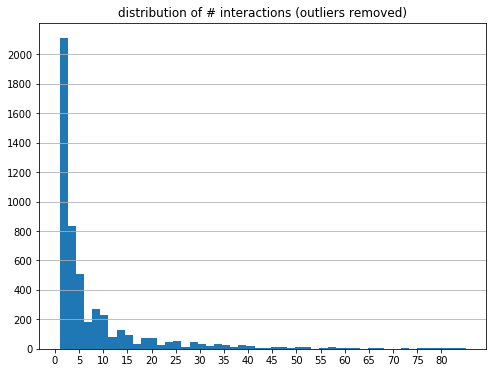

In [8]:


user_counts = df.groupby('email').count()['title']
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(user_counts, bins=50, range=(1,85))
ax.set_xticks(np.arange(0,85,5))
ax.set_yticks(np.arange(0,2200, 200))
ax.set_title('distribution of # interactions (outliers removed)')
ax.grid(which='major', axis='y')
plt.show();



In [10]:
user_counts.describe()

count    5148.000000
mean        8.930847
std        16.802267
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       364.000000
Name: title, dtype: float64

In [ ]:
median_val = 3 # 50% of individuals interact with ____ number of articles or fewer.
max_views_by_user =  364# The maximum number of user-article interactions by any 1 user is ______.

In [11]:
for col in df1.columns:
    print('{} duplicates: {}'.format(col, df1.duplicated(col).sum()))



Unnamed: 0 duplicates: 0
doc_body duplicates: 19
doc_description duplicates: 33
doc_full_name duplicates: 5
doc_status duplicates: 1055
article_id duplicates: 5


In [12]:
df1.shape

(1056, 6)

In [13]:
df.article_id.unique().shape

(714,)

In [14]:
df.email.dropna().unique().shape

(5148,)

In [15]:
df.shape

(45993, 4)

In [ ]:


unique_articles = 714# The number of unique articles that have at least one interaction
total_articles = 1051# The number of unique articles on the IBM platform
unique_users = 5148 # The number of unique users
user_article_interactions = 45993# The number of user-article interactions



In [16]:
df.article_id.value_counts().sort_values(ascending=False).head(5)

1429.0    937
1330.0    927
1431.0    671
1427.0    643
1364.0    627
Name: article_id, dtype: int64

In [ ]:


most_viewed_article_id = '1429.0'# The most viewed article in the dataset as a string with one value following the decimal 
maximum_views = 937# The most viewed article in the dataset was viewed how many times?



In [7]:
df.groupby('email')['article_id'].count()


email
0000b6387a0366322d7fbfc6434af145adf7fed1    13
001055fc0bb67f71e8fa17002342b256a30254cd     4
00148e4911c7e04eeff8def7bbbdaf1c59c2c621     3
001a852ecbd6cc12ab77a785efa137b2646505fe     6
001fc95b90da5c3cb12c501d201a915e4f093290     2
                                            ..
ffc6cfa435937ca0df967b44e9178439d04e3537     2
ffc96f8fbb35aac4cb0029332b0fc78e7766bb5d     4
ffe3d0543c9046d35c2ee3724ea9d774dff98a32    32
fff9fc3ec67bd18ed57a34ed1e67410942c4cd81    10
fffb93a166547448a0ff0232558118d59395fecd    13
Name: article_id, Length: 5148, dtype: int64

In [7]:
df.groupby('email')['article_id'].count().min()


1

In [8]:
df.groupby('email')['article_id'].count().max()


364

In [9]:
import pandas as pd
df = pd.read_csv('user-item-interactions.csv')
df.groupby('title')['article_id'].count().max()


937

Text(0.5, 1.0, 'User interaction with articles')

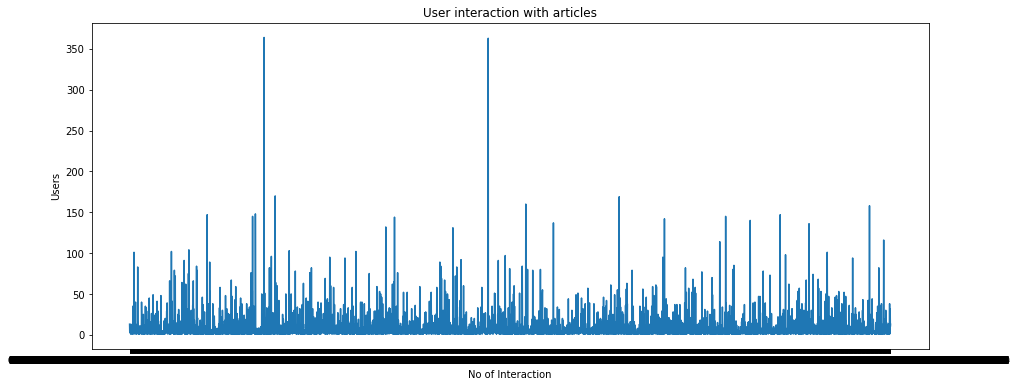

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('user-item-interactions.csv')
inte = df.groupby('email')['article_id'].count()
plt.figure(figsize=(15,6))
plt.plot(inte)
plt.ylabel('Users')
plt.xlabel('No of Interaction')
plt.title('User interaction with articles')

In [15]:
df.duplicated(['article_id']).sum()


45279

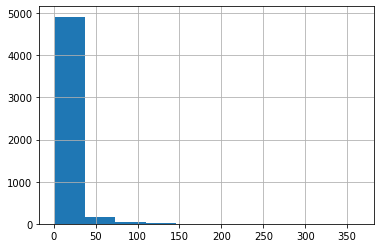

In [11]:
user = df.groupby('email').count()['article_id']
user.hist(bins=10)


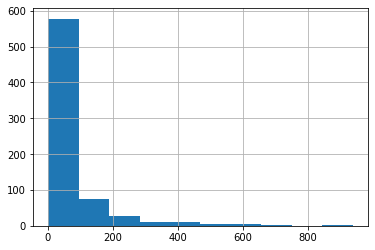

In [11]:
user1= df.groupby('title')['article_id'].count()
user1.hist(bins=10)


In [12]:
user1.describe()


count    714.000000
mean      64.415966
std      109.175923
min        1.000000
25%        8.000000
50%       25.000000
75%       69.000000
max      937.000000
Name: article_id, dtype: float64

In [68]:
def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded1 = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded1.append(coded_dict[val])
    return email_encoded1

email_encoded1 = email_mapper()
del df['email']
df['user_id'] = email_encoded1

df.head()

,Unnamed: 0,article_id,title,user_id
0,0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1,1314.0,healthcare python streaming application demo,2
2,2,1429.0,use deep learning for image classification,3
3,3,1338.0,ml optimization using cognitive assistant,4
4,4,1276.0,deploy your python model as a restful api,5


In [21]:
is_duplicate = df1.duplicated(subset=['article_id'])
duplicated_art_id = df1['article_id'][is_duplicate]
duplicated_art_name = df1['doc_full_name'][is_duplicate]
print('Duplicated article IDs: {}'.format(duplicated_art_id.values))
print('Duplicated article names: {}'.format(duplicated_art_name.values))

Duplicated article IDs: [ 50 221 398 577 232]
Duplicated article names: ['Graph-based machine learning'
 'How smart catalogs can turn the big data flood into an ocean of opportunity'
 'Using Apache Spark as a parallel processing framework for accessing REST based data services'
 'Use the Primary Index'
 'Self-service data preparation with IBM Data Refinery']


In [22]:
print(df1.duplicated().sum())

0


In [23]:
print(df1.duplicated().sum())

0


In [24]:
df1.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
median_val = 3 
unique_articles = 714
total_articles = 1051
unique_users = 5148 
user_article_interactions = 45993
most_viewed_article_id = '1429.0'
maximum_views = 937
max_views_by_user =  364
sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': maximum_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id,
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}


In [26]:
def get_top_most_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    top_articles1 = list(df['title'].value_counts().reset_index().head(n)['index'])
    
    
    return top_articles1 # Return the top article titles from df (not df_articles)

def get_top_most_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles_ids - (list) A list of ids of the top 'n' article titles 
    
    '''
    top_articles1 = list(df['article_id'].value_counts().reset_index().head(n)['index'])
        
    return top_articles1  # Return the top article ids

In [27]:
print(get_top_most_articles(10))
print(get_top_most_article_ids(10))


['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm', 'healthcare python streaming application demo', 'finding optimal locations of new store using decision optimization', 'apache spark lab, part 1: basic concepts', 'analyze energy consumption in buildings', 'gosales transactions for logistic regression model']
[1429.0, 1330.0, 1431.0, 1427.0, 1364.0, 1314.0, 1293.0, 1170.0, 1162.0, 1304.0]


In [28]:
print(get_top_most_articles(5))
print(get_top_most_articles(20))


['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm']
['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm', 'healthcare python streaming application demo', 'finding optimal locations of new store using decision optimization', 'apache spark lab, part 1: basic concepts', 'analyze energy consumption in buildings', 'gosales transactions for logistic regression model', 'welcome to pixiedust', 'customer demographics and sales', 'total population by country', 'deep learning with tensorflow course by big data university', 'model bike sharing data with spss', 'the nurse assignment problem', 'classify tumors with m

In [35]:
df_top_n1 = df.groupby(['article_id']).count().sort_values(['title'],ascending=False).head(10)
print(df_top_n1)


            Unnamed: 0  title  email
article_id                          
1429.0             937    937    937
1330.0             927    927    927
1431.0             671    671    671
1427.0             643    643    643
1364.0             627    627    627
1314.0             614    614    614
1293.0             572    572    572
1170.0             565    565    565
1162.0             512    512    512
1304.0             483    483    483


In [37]:
def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    user_item1 = df.groupby(['user_id', 'article_id'])['article_id'].count().unstack()
    user_item1 = user_item1.fillna(0)
    for col in user_item1.columns.values:
        user_item1[col] = user_item1[col].apply(lambda x: x if x == 0 else 1)
    return user_item1 

user_item1 = create_user_item_matrix(df)
user_item1.head()


article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
assert user_item1.shape[0] == 5149
assert user_item1.shape[1] == 714 
assert user_item1.sum(axis=1)[1] == 36 
print("You have passed our quick tests!  Please proceed!")



You have passed our quick tests!  Please proceed!


In [39]:
def finding_similar_users(user_id, user_item1= user_item1):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item1 - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    similarity1 = user_item1.dot(user_item1.loc[user_id])
    # sort by similarity
    similarity1 = similarity1.sort_values(ascending=False)
    # remove the own user's id
    similarity1.drop(user_id, inplace=True)
    # create list of just the ids
    most_similar_users = list(similarity1.index)
       
    return most_similar_users





In [26]:
print("The 10 most similar users to user 1 are: {}".format(finding_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(finding_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(finding_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [3933, 23, 3782, 203, 4459, 131, 3870, 46, 4201, 5041]
The 5 most similar users to user 3933 are: [1, 23, 3782, 4459, 203]
The 3 most similar users to user 46 are: [4201, 23, 3782]


In [40]:
np.where(user_item1.loc[1]==1)

(array([ 22,  54,  76, 123, 138, 147, 152, 178, 222, 235, 253, 267, 285,
        315, 329, 374, 401, 408, 438, 526, 538, 540, 566, 600, 609, 651,
        656, 665, 672, 678, 697, 699, 700, 701, 706, 708], dtype=int64),)

In [43]:
arti= df.drop_duplicates('article_id')[['article_id', 'title']]

In [44]:
art_id =[111.0, 1427.0]

In [45]:


articles = arti[arti.article_id.isin(art_id)]

[articles[articles.article_id==i]['title'].values[0] for i in art_id]



['tidy up your jupyter notebooks with scripts',
 'use xgboost, scikit-learn & ibm watson machine learning apis']

In [72]:




def get_article_names(article_ids1, df=df):
    '''
    INPUT:
    article_ids1 - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names1 - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    
    all_article_names1 = df[df['article_id'].isin(article_ids1)]['title'].drop_duplicates().values.tolist()
    return all_article_names1 
def get_user_articles(user_id, user_item1=user_item1):
    '''
    INPUT:
    user_id- (int) a user id
    user_item1 - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids1 - (list) a list of the article ids seen by the user
    article_names1 - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    
    user_id = int(float(user_id))
    article_ids1 = list(user_item1.columns[np.where(user_item1.loc[user_id]==1)])
    
    article_names1 = get_article_names(article_ids1)
    return [str(a_id) for a_id in article_ids1], article_names1 


def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''

    recs = []
    viewed1 = get_user_articles(100)
    similar_user_id = finding_similar_users(100)
    for user_id1 in similar_user_id:
        article_ids1, article_names1 = get_user_articles(user_id)
        recs = list(set().union(recs, article_ids1)) 
        if len(recs) >= 10:
            break
    return recs[:m]

In [73]:
get_article_names(user_user_recs(1, 10)) 

['use deep learning for image classification',
 'gosales transactions for naive bayes model',
 'time series prediction using recurrent neural networks (lstms)',
 'finding optimal locations of new store using decision optimization',
 'deep learning with tensorflow course by big data university',
 'shiny: a data scientist’s best friend',
 'new shiny cheat sheet and video tutorial',
 'introduction to market basket analysis in\xa0python',
 'fighting gerrymandering: using data science to draw fairer congressional districts',
 'working with ibm cloud object storage in python']

In [33]:
assert set(get_article_names(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names(['1320.0', '232.0', '844.0'])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(20)[0]) == set(['1320.0', '232.0', '844.0'])
assert set(get_user_articles(20)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(2)[0]) == set(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])
assert set(get_user_articles(2)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")

If this is all you see, you passed all of our tests!  Nice job!


In [106]:


def get_top_sorted_users1(user_id, df=df, user_item1=user_item1):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item1 - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df1 - (pandas dataframe) a dataframe with:
                    neighbor_id1 - is a neighbor user_id
                    similarity1 - measure of the similarity of each user to the provided user_id
                    num_interactions1 - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    
    similarity1 = user_item1.dot(user_item1.loc[user_id])
    
    
    similarity1= similarity1.sort_values(ascending=False).drop(user_id).to_frame(name='similarity1').reset_index()

    
    num_interactions1 = df.user_id.value_counts().to_frame('num_interactions1')
    
    
    neighbors_df1 = similarity1.merge(num_interactions1, left_on='user_id', 
                        right_index=True).rename(columns={'user_id':'neighbor_id1'})

    neighbors_df1.sort_values(by=['similarity1', 'num_interactions1'], ascending=False, inplace=True)
    return neighbors_df1 


def user_user_recs_part(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id1
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    try:
        
        user_article_ids, _ = get_user_articles(user_id)
    except KeyError:
        recs = get_top_article_ids(m)
        return recs, get_article_names(recs)
    neighbours = get_top_sorted_users(user_id).neighbor_id.values
    
    all_articles_sorted = get_top_article_ids(300)
    
    recs1 = []
    
    for user in neighbours:
        neighbour_article_ids, _ = get_user_articles(user)
        not_seen1 = list(set(neighbour_article_ids)-(set(user_article_ids)&set(neighbour_article_ids)))
        
        
        not_seen_sorted = list(set(all_articles_sorted) &set(not_seen1))
        
        recs1.extend(not_seen1)
        if(len(recs1)>=m):
            recs1 = recs1[:m]
            break; 
    
    return recs1, get_article_names(recs1)



In [107]:
get_top_sorted_users1(1).head(5)

,neighbor_id1,similarity1,num_interactions1
0,3933,35.0,45
1,23,17.0,364
2,3782,17.0,363
3,203,15.0,160
4,4459,15.0,158


In [108]:
rec_ids, rec_names = user_user_recs_part(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
['125.0', '1351.0', '302.0', '1444.0', '1329.0', '142.0', '1160.0', '1152.0', '205.0', '555.0']

The top 10 recommendations for user 20 are the following article names:
['model bike sharing data with spss', 'analyze accident reports on amazon emr spark', 'accelerate your workflow with dsx', "a beginner's guide to variational methods", 'neural networks for beginners: popular types and applications', 'airbnb data for analytics: venice reviews', 'worldwide fuel oil consumption by household (in 1000 metric tons)', 'statistics for hackers', 'ingest data from message hub in a streams flow', 'build a naive-bayes model with wml & dsx']


In [85]:
user1_most_sim = 3933 
user131_10th_sim = 242

In [87]:
sol_5_dict = {
    'The user that is most similar to user 1.': user1_most_sim, 
    'The user that is the 10th most similar to user 131': user131_10th_sim,
}


In [88]:


new_user = '0.0'

new_user_recs, new_user_recs_names = user_user_recs_part2('0.0', 10)



In [83]:


assert set(new_user_recs) == set(['1314.0','1429.0','1293.0','1427.0','1162.0','1364.0','1304.0','1170.0','1431.0','1330.0']), "Oops!  It makes sense that in this case we would want to recommend the most popular articles, because we don't know anything about these users."

print("That's right!  Nice job!")



That's right!  Nice job!


In [46]:


def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    ids1 = df.article_id.value_counts().sort_values(ascending=False).head(n).index
    top_articles1 = df.loc[~df.article_id.duplicated() & df.article_id.isin(ids1)].title.values

    return top_articles1 

def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles (str)- (list) A list of the top 'n' article ids
    
    '''
    top_articles = list(map(str, df.article_id.value_counts().sort_values(ascending=False).head(n).index))
    return top_articles 



In [47]:


print(get_top_articles(10))
print(get_top_article_ids(10))



['healthcare python streaming application demo'
 'use deep learning for image classification'
 'apache spark lab, part 1: basic concepts'
 'predicting churn with the spss random tree algorithm'
 'analyze energy consumption in buildings'
 'visualize car data with brunel'
 'use xgboost, scikit-learn & ibm watson machine learning apis'
 'gosales transactions for logistic regression model'
 'insights from new york car accident reports'
 'finding optimal locations of new store using decision optimization']
['1429.0', '1330.0', '1431.0', '1427.0', '1364.0', '1314.0', '1293.0', '1170.0', '1162.0', '1304.0']


In [36]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('abc')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\koustubhapriya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\koustubhapriya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\koustubhapriya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package abc to
[nltk_data]     C:\Users\koustubhapriya\AppData\Roaming\nltk_data...
[nltk_data]   Package abc is already up-to-date!


In [40]:


def tokenize(x):
    '''
    Tokenize any string into seperate words. 
    Use lemmatizer to break words down into core forms, and then keep only words with meaning

    Inputs
    x (str) - string to break down

    Outputs
    filtered (array, str) - words that are special to the string
    '''
    stop_words1 = (set(stopwords1.words('english')) | set(nltk.corpus.abc.words()))
    tokens1 = word_tokenize(x) 
    lemmatizer1 = WordNetLemmatizer()
    clean_tokens1=[]
    for token in tokens1:
    
        clean_token1 = lemmatizer.lemmatize(token).lower().strip()
        clean_tokens1.append(clean_token1)
        
    filtered1 = [word for word in clean_tokens1 if word not in stop_words1 and word.isalpha()]
    return filtered1




In [41]:
def make_content_recs(data_id1, user_id1=True, m=10, df=df):
    '''
    INPUT:
        data_id1 (str) - id of either user or article
        user_id1 (bool) - if true, make recs based on user
        m (int) - number of recommendations to give based on term
    OUTPUT:
        recs (list) - list of article ids that are recommended
        rec_names (list) - list of article names that are recommended
        
    Description:
       This content based recommender looks at the articles the user has interacted with.
       It goes through each article title and using he NLTK library, finds the most common words
       (related to content) throughout all the articles.
              
       Based on these most common words, the recommender looks at the sums of words in
       the title of each article, and based on the number of matches as well as the
       general popularity of the article it gives back the best recommendations.
    '''
    if(user_id1):
        user_id1 = data_id1
        try:
            #get already read articles
            article_ids1, _ = get_user_articles(user_id1)
        except KeyError: #user does not exist
            print('User Doesnt Exist, Recommending Top Articles')
            recs = get_top_article_ids(m)
            return recs, get_article_names(recs)
    
    else:
        article_ids1 = data_id1
        
    title_data1 = df.drop_duplicates(subset='article_id') #drop duplicates 
    titles1 = title_data[title_data.article_id.isin(list(map(float, article_ids1)))].title
    
    title_words1=[]
    tokenized1 = tokenize(titles.str.cat(sep=' '))
    title_words1.extend(tokenized1)
    
    common_words1 = pd.value_counts(title_words1).sort_values(ascending=False)[:10].index

    top_matches1={}
    for word in common_words1:
        word_count1 = pd.Series(title_data1.title.str.count(word).fillna(0)) #gets occurences of each word in title
        top_matches1[word] = word_count1
                    
    top_matches1 = pd.DataFrame(top_matches1) # num_cols== num of most common words
    top_matches1['top_matches'] = top_matches1.sum(axis=1)
    top_matches1['article_id'] = title_data1.article_id.astype(float)
    
    
    article_occurences1 = pd.DataFrame({'occurences':df.article_id.value_counts()})

    top_matches1 = top_matches.merge(article_occurences, left_on='article_id', right_index=True)
    top_matches1.sort_values(['top_matches1', 'occurences'], ascending=False, inplace=True)    
    
    recs_df = top_matches1[~top_matches1.article_id.isin(list(map(float, article_ids1)))]
    
    recs = recs_df.article_id[:m].values.astype(str)
    rec_names = get_article_names(recs)
    
    return recs, rec_names



In [43]:
make_content_recs('0.0', user_id1=True)

User Doesnt Exist, Recommending Top Articles


(['1429.0',
  '1330.0',
  '1431.0',
  '1427.0',
  '1364.0',
  '1314.0',
  '1293.0',
  '1170.0',
  '1162.0',
  '1304.0'],
 ['healthcare python streaming application demo',
  'use deep learning for image classification',
  'apache spark lab, part 1: basic concepts',
  'predicting churn with the spss random tree algorithm',
  'analyze energy consumption in buildings',
  'visualize car data with brunel',
  'use xgboost, scikit-learn & ibm watson machine learning apis',
  'gosales transactions for logistic regression model',
  'insights from new york car accident reports',
  'finding optimal locations of new store using decision optimization'])

In [44]:


user_item1.head()


u, s, vt = np.linalg.svd(user_item1, full_matrices=False, compute_uv=True)
print(u.shape)
print(s.shape)
print(vt.shape)



(5149, 714)
(714,)
(714, 714)


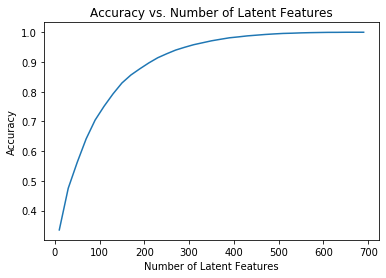

In [49]:


num_latent_feats1 = np.arange(10,700+10,20)
sum_errs1 = []

for k in num_latent_feats1:
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    user_item_est1 = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    diffs1 = np.subtract(user_item1, user_item_est1)
    
    err1 = np.sum(np.sum(np.abs(diffs1)))
    sum_errs1.append(err1)
    
    
plt.plot(num_latent_feats1, 1 - np.array(sum_errs1)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');



In [52]:


df_train1 = df.head(40000)
df_test1 = df.tail(5993)

def create_test_and_train_user_item(df_train1, df_test1):
    '''
    INPUT:
    df_train1 - training dataframe
    df_test1 - test dataframe
    
    OUTPUT:
    user_item_train1 - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test1 - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx1 - all of the test user ids
    test_arts1 - all of the test article ids
    
    '''
    user_item_train1 = create_user_item_matrix(df_train1)
    user_item_test1 = create_user_item_matrix(df_test1)
    
    test_idx1 = list(user_item_test1.index)
    test_arts1 = list(user_item_test1.columns)
    
    return user_item_train1, user_item_test1, test_idx1, test_arts1

user_item_train1, user_item_test1, test_idx1, test_arts1 = create_test_and_train_user_item(df_train1, df_test1)



In [53]:
user_item_test1.shape

(682, 574)

In [54]:
train_idx1 = user_item_train1.index
train_arts1 = user_item_train1.columns

In [55]:
test_user_subset1 = np.intersect1d(test_idx1, train_idx1)

len(np.intersect1d(test_idx1, train_idx1))

20

In [56]:
user_item_test1.shape[0] - len(test_user_subset1)

662

In [61]:

a = 662 
b = 574 
c = 20 
d = 0 


sol_4_dict1 = {
    'How many users can we make predictions for in the test set?':c, 
    'How many users in the test set are we not able to make predictions for because of the cold start problem?':a, 
    'How many movies can we make predictions for in the test set?':b,
    'How many movies in the test set are we not able to make predictions for because of the cold start problem?':d, 
}

u_train1, s_train1, vt_train1 = np.linalg.svd(user_item_train1)

test_rows_idx1 = user_item_train1.index.isin(test_idx1)
test_col_idxs1 = user_item_train1.columns.isin(test_arts1)
u_test1 = u_train1[test_rows_idx1, :]
vt_test1 = vt_train1[:, test_col_idxs1]


user_present_both1 = np.intersect1d(user_item_test1.index, user_item_train1.index)
user_item_test_predictable1 = user_item_test1[user_item_test1.index.isin(user_present_both1)]

num_latent_feats = np.arange(10,700+10,20)
sum_errs_train1 = []
sum_errs_test1 = []

for k in num_latent_feats1:
    s_train_lat1, u_train_lat1, vt_train_lat1 = np.diag(s_train1[:k]), u_train1[:, :k], vt_train1[:k, :]
    u_test_lat1, vt_test_lat1 = u_test1[:, :k], vt_test1[:k, :]
    
    user_item_train_est1 = np.around(np.dot(np.dot(u_train_lat1, s_train_lat1), vt_train_lat1))
    user_item_test_est1 = np.around(np.dot(np.dot(u_test_lat1, s_train_lat1), vt_test_lat1))
    
    diffs_train1 = np.subtract(user_item_train1, user_item_train_est1)
    diffs_test1 = np.subtract(user_item_test_predictable1, user_item_test_est1)
    
    err_train1 = np.sum(np.sum(np.abs(diffs_train1)))
    err_test1 = np.sum(np.sum(np.abs(diffs_test1)))
    sum_errs_train1.append(err_train1)
    sum_errs_test1.append(err_test1)



In [62]:


print(u_train1.shape)
print(s_train1.shape)
print(vt_train1.shape)



(4487, 4487)
(714,)
(714, 714)


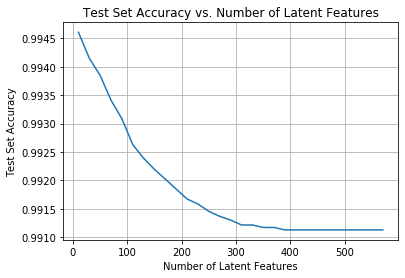

In [64]:


test_user_subset1 = np.intersect1d(test_idx1, train_idx1)

len(np.intersect1d(test_idx1, train_idx1))
test_articles_subset1 = np.intersect1d(test_arts1, train_arts1)

len(np.intersect1d(test_arts1, train_arts1))
user_item_test_mat1 = user_item_test1.loc[test_user_subset1,test_articles_subset1]
num_latent_feats1 = np.arange(10,570+10,20)
sum_errs1 = []

for k in num_latent_feats1:
    s_train_new1, u_train_new1, vt_train_new1 = np.diag(s_train1[:k]), u_train1[:, :k], vt_train1[:k, :]
    s_test_new1, u_test_new1, vt_test_new1 = s_train_new1, u_test1[:, :k], vt_test1[:k, :]
    
    user_item_test_est1 = np.around(np.dot(np.dot(u_test_new1, s_test_new1), vt_test_new1))
    
    diffs1 = np.subtract(user_item_test_mat1, user_item_test_est1)
    
    err1 = np.sum(np.sum(np.abs(diffs1)))
    sum_errs1.append(err1)
    
    
plt.plot(num_latent_feats1, 1 - np.array(sum_errs1)/df.shape[0]);
plt.grid();
plt.xlabel('Number of Latent Features');
plt.ylabel('Test Set Accuracy');
plt.title('Test Set Accuracy vs. Number of Latent Features');



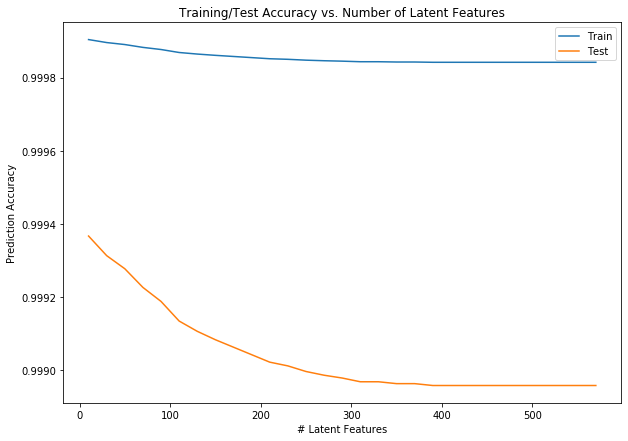

In [66]:


plt.figure(figsize=(10, 7))
plt.plot(num_latent_feats1, 1 - np.array(sum_errs1)/(user_item_train1.shape[0] 
                                                         * user_item_test1.shape[1]), label='Train')
plt.plot(num_latent_feats1, 1 - np.array(sum_errs1)/(user_item_test1.shape[0] 
                                                        * user_item_test1.shape[1]), label='Test')
plt.xlabel('# Latent Features')
plt.ylabel('Prediction Accuracy')
plt.legend()
plt.title('Training/Test Accuracy vs. Number of Latent Features')
plt.show()



In [ ]:
# Which Test to use
Use the cell below to comment on the results you found in the previous question. Given the circumstances of your results,
discuss what you might do to determine if the recommendations you make with any of the above recommendation systems are an 
improvement to how users currently find articles?

The first important thing to note is that we only have a sample of 20 users in which to make predictions on 
and generalize the model. This is a very small sample to base any solid conclusions on. And even though the 
accuracy score seems very high this is largely due to the imbalance between the two classes, we have many more 0's than 1's.

Based on the accuracy graph we have produced above, the number of latent features of around 150 (somewhere between 100 and 200) 
based on the "elbow" of the graph would be a good value to use for SVD in our recommendation model.

However, considering the low sample, a better approach might be to do an online test instead of an offline test to 
determine the impact of the recommendation functions. We could use a type of A/B testing where we split the users into 2 groups , 
with the first group continuing with the old recommenadation system and the second group using the new recommendation functions. 
We then measure the mean interactions between the two groups and use hypothesis testing to see if the second group has an 
increased interaction with the articles at a given confidence level.

In [109]:


from subprocess import call
call(['python', '-m', 'nbconvert', 'Recommendations_with_IBM.ipynb'])



4294967295